In [1]:
import sys
sys.path.append("../core-scripts")
import zeroShearSpectrum2D
import zeroShearSpectrum3D
from Utilities import prune_evs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Colors for plotting!
cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [89]:
def compute_zero_shear_specs(k,a,x=0.01,M_low=50,M_high=100):
    low_res_2D = np.array(zeroShearSpectrum2D.spectrum(k,a,_ell_over_W_squared=x,M=M_low), dtype=np.complex128)
    high_res_2D = np.array(zeroShearSpectrum2D.spectrum(k,a,_ell_over_W_squared=x,M=M_high), dtype=np.complex128)
    low_res_3D, _ = zeroShearSpectrum3D.spectrum(k,a,_ell_over_W_squared=x,M=M_low)
    high_res_3D, _ = zeroShearSpectrum3D.spectrum(k,a,_ell_over_W_squared=x,M=M_high)
    low_res_3D = np.array(low_res_3D, dtype=np.complex128)
    high_res_3D = np.array(high_res_3D, dtype=np.complex128)
    pruned_2D = prune_evs(low_res_2D, high_res_2D)
    pruned_3D = prune_evs(low_res_3D, high_res_3D)
    return (pruned_2D, pruned_3D)

In [23]:
# Evaluate the spectrum at zero (very small) activity at different wavenumber values
kl,kr,kn = 0.001, 2, 8
ks = np.linspace(kl,kr,kn)
spec_k_2D = np.zeros(kn,dtype=np.complex128)
spec_k_3D = np.zeros(kn,dtype=np.complex128)
a = 10

for i in range(kn):
    print("{}/{} k values computed".format(i+1,kn))
    k = ks[i]
    pruned_2D, pruned_3D = compute_zero_shear_specs(k,a)
    spec_k_2D[i] = pruned_2D[0]
    spec_k_3D[i] = pruned_3D[0]
# np.savetxt("data/2D-3D-zero-shear-comp/k-spectrum/spec-k-2D.txt", spec_k_2D)
# np.savetxt("data/2D-3D-zero-shear-comp/k-spectrum/spec-k-3D.txt", spec_k_3D)

1/8 k values computed
2/8 k values computed
3/8 k values computed
4/8 k values computed
5/8 k values computed
6/8 k values computed
7/8 k values computed
8/8 k values computed


In [38]:
# Evaluate the spectrum at zero (very small) wavenumber at different activity values
al,ar,an = 0.9, 5, 8
acts = np.linspace(al,ar,an)
k = 0.001
spec_a_2D = np.zeros(an,dtype=np.complex128)
spec_a_3D = np.zeros(an,dtype=np.complex128)
for i in range(an):
    print("{}/{} a values computed".format(i+1,an))
    a = acts[i]
    pruned_2D, pruned_3D = compute_zero_shear_specs(k,a)
    spec_a_2D[i] = pruned_2D[0]
    spec_a_3D[i] = pruned_3D[0]

1/8 a values computed
2/8 a values computed
3/8 a values computed
4/8 a values computed
5/8 a values computed
6/8 a values computed
7/8 a values computed
8/8 a values computed


In [ ]:
plt.plot(ks,np.real(spec_k_2D))
plt.plot(ks,np.real(spec_k_3D))
plt.legend(["2D","3D"])
plt.xlabel("$k$")

Text(0.5, 0, '$a$')

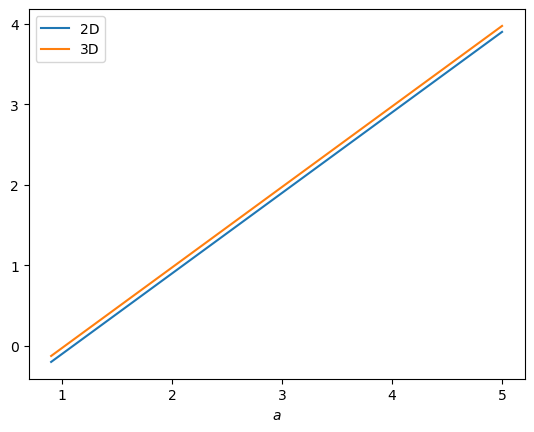

In [39]:
plt.plot(acts,np.real(spec_a_2D))
plt.plot(acts,np.real(spec_a_3D))
# plt.plot(acts,np.real(spec_a_2D - spec_a_3D))
plt.legend(["2D","3D"])
plt.xlabel("$a$")

In [119]:
al,ar,an = 0.001, 2, 20
kl,kr,kn = 0.001, 20, 20

acts = np.linspace(al,ar,an)
ks = np.linspace(kl,kr,kn)
spec2D = np.zeros((an,kn),dtype=np.complex128)
spec3D = np.zeros((an,kn),dtype=np.complex128)

In [40]:
# Evaluate the spectrum on a grid of activity and wavenumber values
for i in range(an):
    print("{}/{} a values computed".format(i+1,an))
    for j in range(kn):
        a = acts[i]
        k = ks[j]
        low_res_2D = np.array(zeroShearSpectrum2D.spectrum(k,a,M=50), dtype=np.complex128)
        high_res_2D = np.array(zeroShearSpectrum2D.spectrum(k,a,M=100), dtype=np.complex128)
        low_res_3D, _ = zeroShearSpectrum3D.spectrum(k,a,M=50)
        high_res_3D, _ = zeroShearSpectrum3D.spectrum(k,a,M=100)
        low_res_3D = np.array(low_res_3D, dtype=np.complex128)
        high_res_3D = np.array(high_res_3D, dtype=np.complex128)
        pruned_2D = prune_evs(low_res_2D, high_res_2D)
        pruned_3D = prune_evs(low_res_3D, high_res_3D)
        spec2D[i][j] = pruned_2D[0]
        spec3D[i][j] = pruned_3D[0]
np.savetxt("data/2D-3D-zero-shear-comp/spec2D.txt", spec2D)
np.savetxt("data/2D-3D-zero-shear-comp/spec3D.txt", spec3D)

1/20 a values computed
2/20 a values computed
3/20 a values computed
4/20 a values computed
5/20 a values computed
6/20 a values computed
7/20 a values computed
8/20 a values computed
9/20 a values computed
10/20 a values computed
11/20 a values computed
12/20 a values computed
13/20 a values computed
14/20 a values computed
15/20 a values computed
16/20 a values computed
17/20 a values computed
18/20 a values computed
19/20 a values computed
20/20 a values computed


In [9]:
def plot_stability(acts, ks, evs):
    an = len(acts)
    kn = len(ks)
    gr_th_zr = np.real(evs) > 0
    for i in range(an):
        for j in range(kn):
            c = "red" if gr_th_zr[i][j] else "blue"
            plt.plot(ks[j],acts[i],".",color=c, picker=True)
            plt.xlabel("$k$")
            plt.ylabel("$a$")
            blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                                  markersize=10, label='stable')
            red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                                  markersize=10, label='unstable')
            plt.legend(handles=[blue_dot, red_dot], loc='upper right')

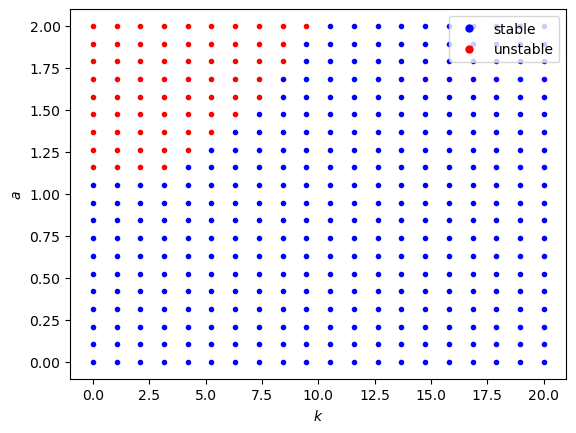

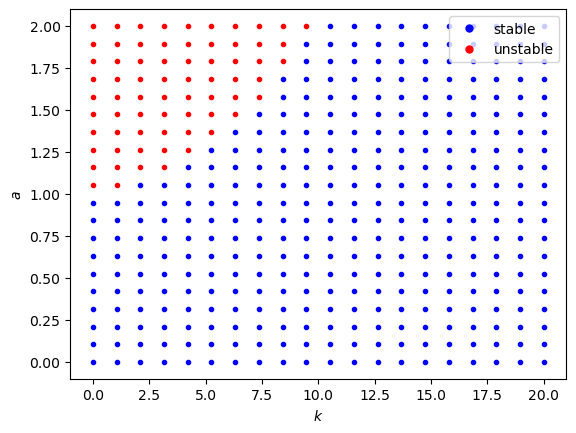

In [10]:
al,ar,an = 0.001, 2, 20
kl,kr,kn = 0.001, 20, 20
acts = np.linspace(al,ar,an)
ks = np.linspace(kl,kr,kn)

spec2D = np.loadtxt("data/2D-3D-zero-shear-comp/spec2D.txt", dtype=np.complex_)
spec3D = np.loadtxt("data/2D-3D-zero-shear-comp/spec3D.txt", dtype=np.complex_)
plt.figure()
plot_stability(acts,ks,spec2D)
plt.figure()
plot_stability(acts,ks,spec3D)

Text(0.2, 0.3, 'Dot-3D | Dash-2D')

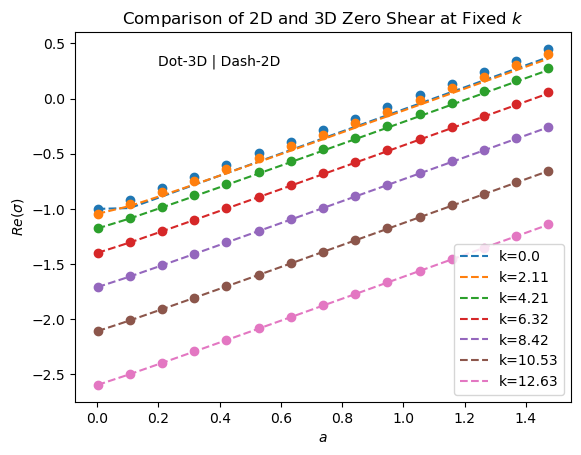

In [15]:
k_idx = [0,2,4,6,8,10,12]
plot_range = range(15)
color_indx = 0
for idx in k_idx:
    plt.plot(acts[plot_range], np.real(spec2D[plot_range,idx]), '--', color=cs[color_indx], label="k={}".format(np.round(ks[idx],2)))
    plt.plot(acts[plot_range], np.real(spec3D[plot_range,idx]), 'o', color=cs[color_indx])
    color_indx = (color_indx + 1) % len(cs)
# plt.plot(acts[plot_range], np.zeros(len(plot_range)),color='black',alpha=0.34)
plt.legend()
plt.xlabel("$a$")
plt.ylabel("$Re(\sigma)$")
plt.title("Comparison of 2D and 3D Zero Shear at Fixed $k$")
plt.text(0.2,0.3,"Dot-3D | Dash-2D")

Text(0.25, -1.85, 'Dot-3D | Dash-2D')

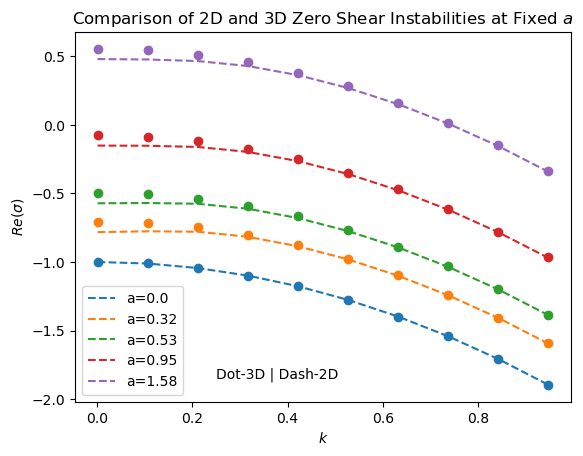

In [16]:
a_idx = [0, 3, 5, 9, 15]
plot_range = range(10)
color_indx = 0
for idx in a_idx:
    plt.plot(acts[plot_range], spec2D[idx,plot_range], '--', color=cs[color_indx], label="a={}".format(np.round(acts[idx],2)))
    plt.plot(acts[plot_range], spec3D[idx,plot_range], 'o', color=cs[color_indx])
    color_indx = (color_indx+1) % len(cs)
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$Re(\sigma)$")
plt.title("Comparison of 2D and 3D Zero Shear Instabilities at Fixed $a$")
plt.text(0.25,-1.85,"Dot-3D | Dash-2D")

# Effect of changing $l^2/W^2$ (increasing/decreasing correlation length and/or channel width)

In [110]:
# Fix activity, evaluate the spectrum at different values of k and l^2/W^2
xs = [2,1,0.1, 0.01,0.001]
ks = [0.001, 1, 2, 4, 10, 20]
a = 1
spec_ell_2D_k = np.zeros((len(ks), len(xs)), dtype=np.complex128)
spec_ell_3D_k = np.zeros((len(ks), len(xs)), dtype=np.complex128)
for i in range(len(ks)):
    for j in range(len(xs)):
        pruned_2D, pruned_3D = compute_zero_shear_specs(ks[i],a,x=xs[j])
        spec_ell_2D_k[i][j] = pruned_2D[0]
        spec_ell_3D_k[i][j] = pruned_3D[0]

In [174]:
np.savetxt("data/2D-3D-zero-shear-comp/l-over-W-sq-spectrum/spec-ell-2D-k.txt", spec_ell_2D_k)
np.savetxt("data/2D-3D-zero-shear-comp/l-over-W-sq-spectrum/spec-ell-3D-k.txt", spec_ell_3D_k)

Text(0.5, 1.0, 'Normalized Re($\\sigma$) vs. $l^2/W^2$ at different values of $k$, $a=1$')

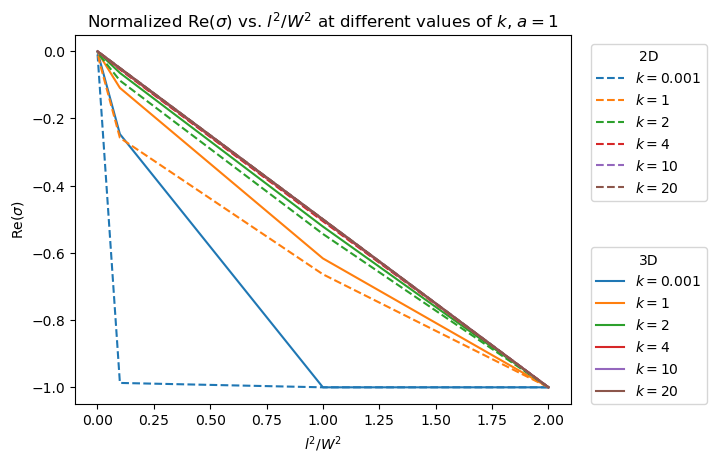

In [7]:
# Here we find that the 3D system stabilizes SLOWER than the 2D system
# as the correlation length is increased. But at large wavenumbers, the difference doesn't seem
# to be important
xs = [2,1,0.1, 0.01,0.001] # these are values of l^2/W^2
ks = [0.001, 1, 2, 4, 10, 20]

fig, ax = plt.subplots()
lines_2D = []
lines_3D = []

spec_ell_2D_k = np.loadtxt("data/2D-3D-zero-shear-comp/l-over-W-sq-spectrum/spec-ell-2D-k.txt",dtype=np.complex128)
spec_ell_3D_k = np.loadtxt("data/2D-3D-zero-shear-comp/l-over-W-sq-spectrum/spec-ell-3D-k.txt",dtype=np.complex128)


for k_indx in range(len(ks)):
    spec2D_k = np.real(spec_ell_2D_k[k_indx])
    spec3D_k = np.real(spec_ell_3D_k[k_indx])
    line_2D, = plt.plot(xs, spec2D_k/np.max(abs(spec2D_k)),'--', label="$k={}$".format(ks[k_indx]), color=cs[k_indx])
    line_3D, = plt.plot(xs, spec3D_k/np.max(abs(spec3D_k)), label="$k={}$".format(ks[k_indx]), color=cs[k_indx])
    plt.xlabel("$l^2/W^2$")
    plt.ylabel("Re($\sigma$)")
    lines_2D.append(line_2D)
    lines_3D.append(line_3D)
plt.title("Normalized Re($\sigma$) vs. $l^2/W^2$ at different values of $k$, $a$=1")
legend_2D = ax.legend(handles=lines_2D, loc=(1.04,0.55), title="2D")
ax.add_artist(legend_2D)
ax.legend(handles=lines_3D, loc=(1.04,0), title="3D")
plt.title("Normalized Re($\sigma$) vs. $l^2/W^2$ at different values of $k$, $a=1$")

In [175]:
# Fix k, evaluate the spectrum at different values of a and l^2/W^2
xs = [2,1,0.1, 0.01,0.001]
acts = [0.75, 0.9, 1, 1.2, 1.7, 3, 5]
k = 1
spec_ell_2D_a = np.zeros((len(acts), len(xs)), dtype=np.complex128)
spec_ell_3D_a = np.zeros((len(acts), len(xs)), dtype=np.complex128)
for i in range(len(acts)):
    for j in range(len(xs)):
        pruned_2D, pruned_3D = compute_zero_shear_specs(k,acts[i],x=xs[j])
        spec_ell_2D_a[i][j] = pruned_2D[0]
        spec_ell_3D_a[i][j] = pruned_3D[0]

In [176]:
np.savetxt("data/2D-3D-zero-shear-comp/l-over-W-sq-spectrum/spec-ell-2D-a.txt", spec_ell_2D_a)
np.savetxt("data/2D-3D-zero-shear-comp/l-over-W-sq-spectrum/spec-ell-3D-a.txt", spec_ell_3D_a)

Text(0.5, 1.0, 'Normalized Re($\\sigma$) vs. $l^2/W^2$ at different values of $a$, $k=1$')

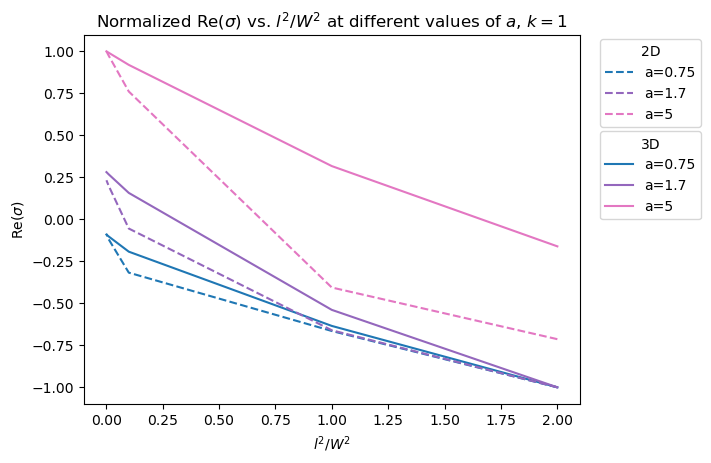

In [215]:
lines_2D = []
lines_3D = []
fig, ax = plt.subplots()

for a_indx in [0,4,len(acts)-1]:
    spec2D_a = np.real(spec_ell_2D_a[a_indx])
    spec3D_a = np.real(spec_ell_3D_a[a_indx])
    line_2D, = plt.plot(xs, spec2D_a/np.max(abs(spec2D_a)),'--',label="a={}".format(acts[a_indx]),color=cs[a_indx])
    line_3D, = plt.plot(xs, spec3D_a/np.max(abs(spec3D_a)),label="a={}".format(acts[a_indx]),color=cs[a_indx])
    lines_2D.append(line_2D)
    lines_3D.append(line_3D)
plt.xlabel("$l^2/W^2$")
plt.ylabel("Re($\sigma$)")
legend_2D = ax.legend(handles=lines_2D, loc=(1.04,0.75), title="2D")
ax.add_artist(legend_2D)
ax.legend(handles=lines_3D, loc=(1.04,0.5), title="3D")
plt.title("Normalized Re($\sigma$) vs. $l^2/W^2$ at different values of $a$, $k=1$")